In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Ganesh Baskar/OneDrive/Documents/Data/Insurance_data.csv")
df

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,PLCY100000,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low
1,PLCY100001,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium
2,PLCY100002,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low
3,PLCY100003,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low
4,PLCY100004,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low
...,...,...,...,...,...,...,...,...,...,...,...
9995,PLCY109995,28,Female,Health,24823.91,9.3,0,0,281.33,412.98,Low
9996,PLCY109996,42,Male,Auto,20620.92,NaN,0,1,551.65,2024.50,Medium
9997,PLCY109997,30,Male,Life,41804.32,7.5,0,0,271.46,400.78,Low
9998,PLCY109998,44,Female,Life,17304.98,10.4,0,0,320.76,386.76,Low


In [3]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Policy_ID                10000 non-null  object 
 1   Customer_Age             10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Policy_Type              10000 non-null  object 
 4   Annual_Income            9538 non-null   float64
 5   Vehicle_or_Property_Age  9015 non-null   float64
 6   Claim_History            10000 non-null  int64  
 7   Fraudulent_Claim         10000 non-null  int64  
 8   Premium_Amount           9472 non-null   float64
 9   Claim_Amount             10000 non-null  float64
 10  Risk_Score               10000 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 859.5+ KB


# Handling Missing values

In [6]:
df.isnull().sum()

Policy_ID                    0
Customer_Age                 0
Gender                       0
Policy_Type                  0
Annual_Income              462
Vehicle_or_Property_Age    985
Claim_History                0
Fraudulent_Claim             0
Premium_Amount             528
Claim_Amount                 0
Risk_Score                   0
dtype: int64

In [7]:
# Checking for income distribution symmetry

df["Annual_Income"].skew() 

np.float64(1.7819170111823277)

In [8]:
df["Vehicle_or_Property_Age"].skew()

np.float64(1.4624902374888198)

In [9]:
df["Premium_Amount"].skew()

np.float64(1.1521945684476127)

In [10]:
# Drop Policy_ID as it's not useful for modeling
df.drop("Policy_ID", axis=1, inplace=True)

In [11]:
# checking Policy_ID is dropped
df.columns

Index(['Customer_Age', 'Gender', 'Policy_Type', 'Annual_Income',
       'Vehicle_or_Property_Age', 'Claim_History', 'Fraudulent_Claim',
       'Premium_Amount', 'Claim_Amount', 'Risk_Score'],
      dtype='object')

<Axes: >

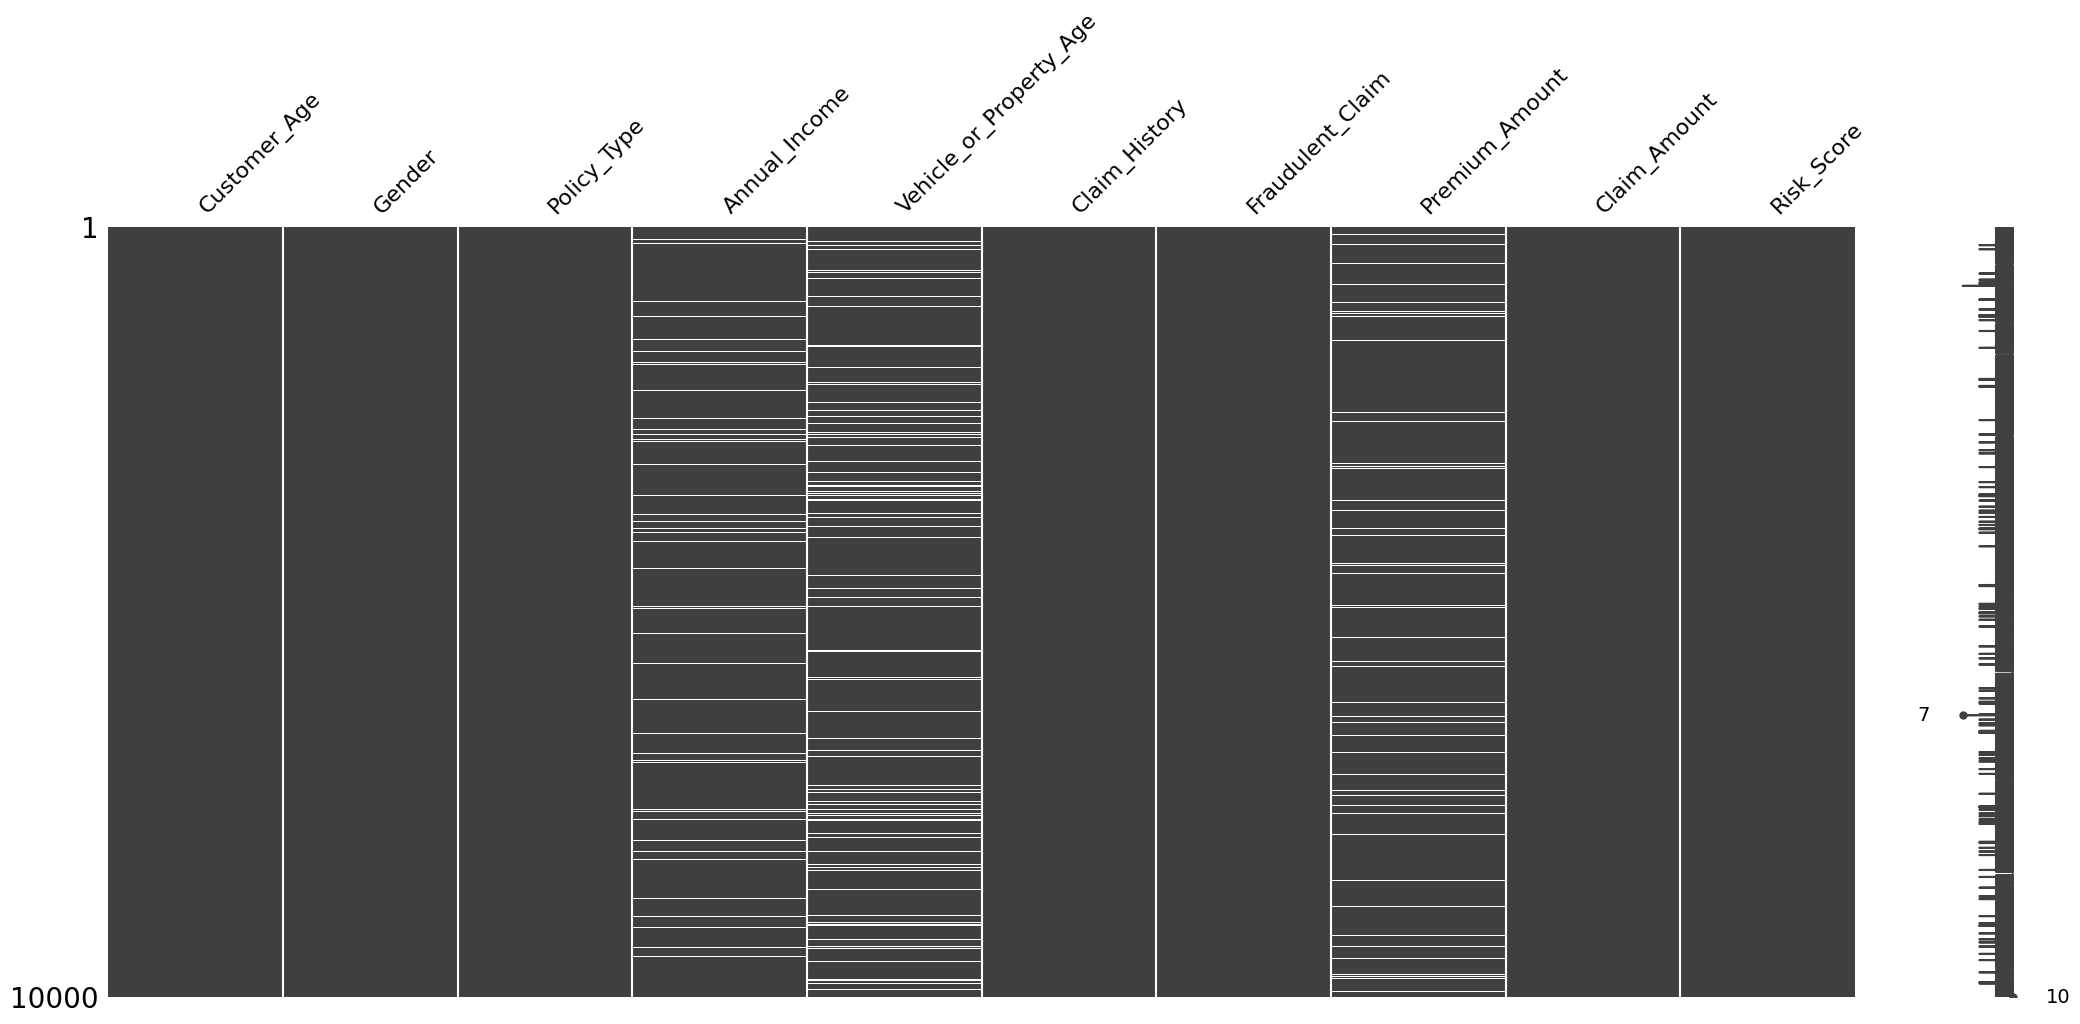

In [12]:
msno.matrix(df)

In [13]:
# Handle missing values based on skewness
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            if abs(df[col].skew()) > 1:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_22716\517898944.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_22716\517898944.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

<Axes: >

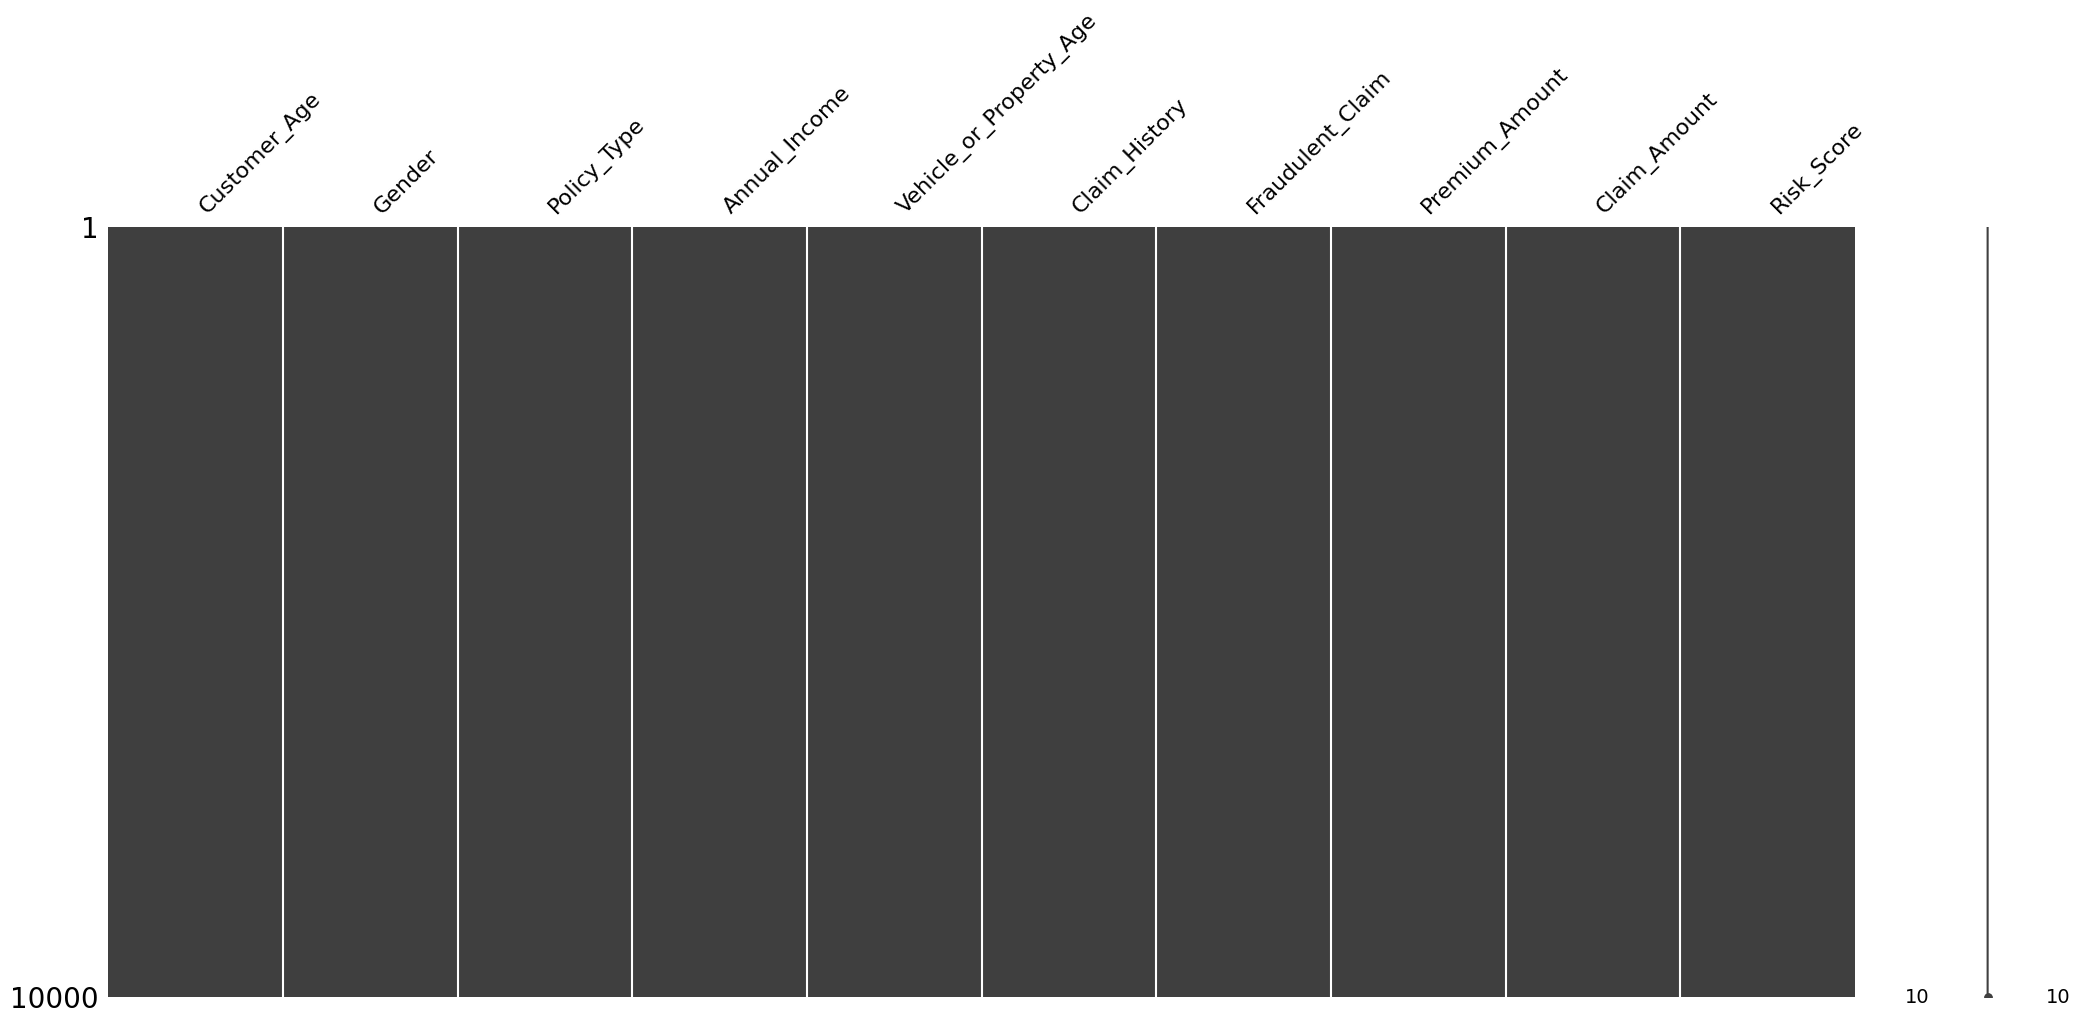

In [14]:
msno.matrix(df)

In [15]:
df.duplicated().sum()

np.int64(0)

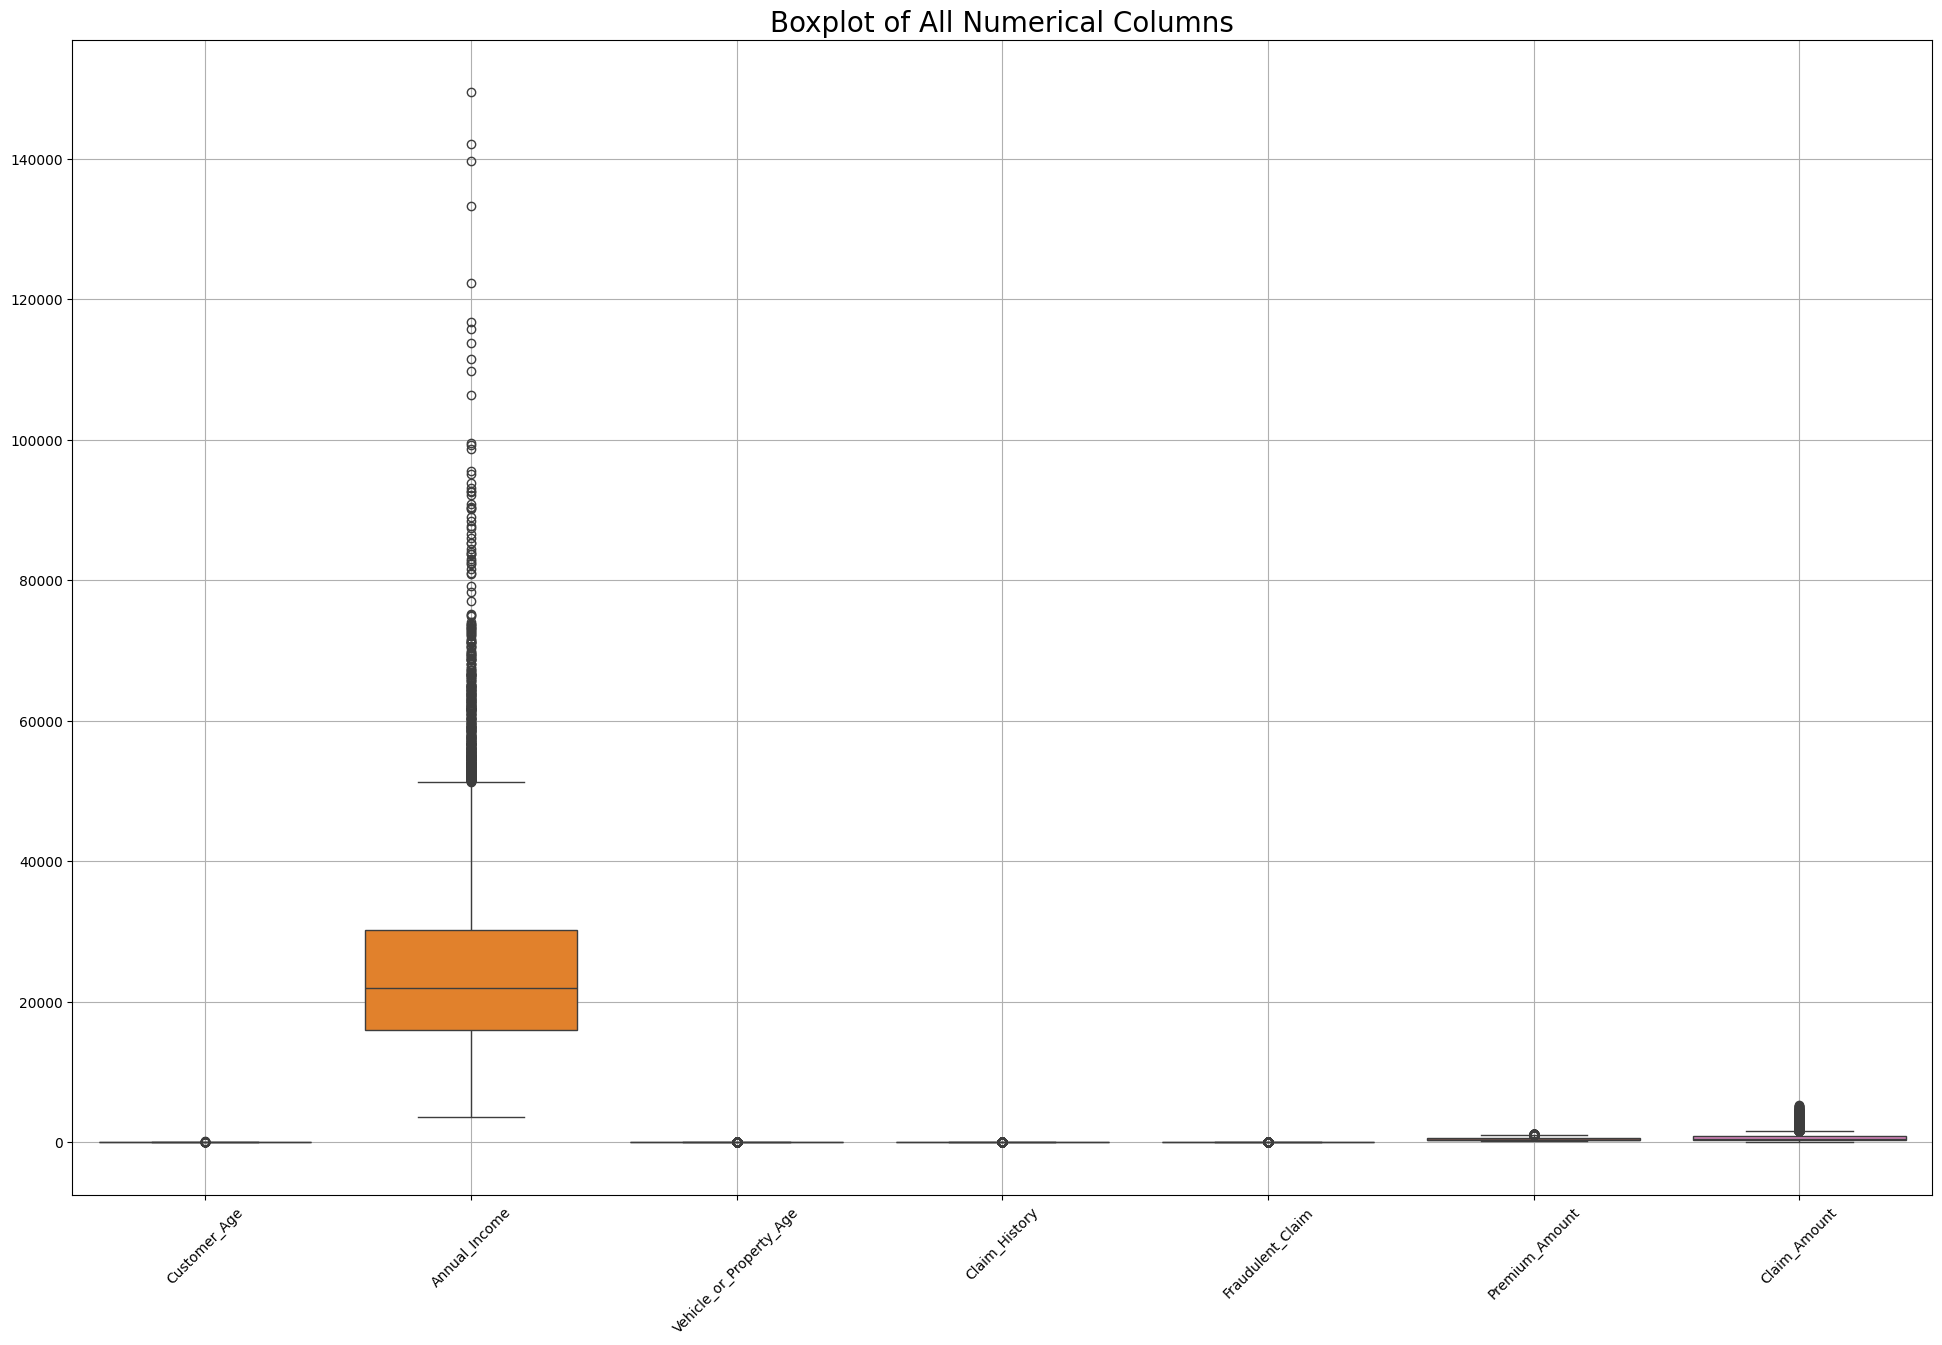

In [16]:
# Set up a large figure for better visibility
plt.figure(figsize=(24, 15))

# Create a boxplot for the entire DataFrame
sns.boxplot(data=df)

# Display the plot
plt.title("Boxplot of All Numerical Columns", fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [18]:
# List of numerical columns to check for outliers
num_cols = ['Customer_Age', 'Annual_Income', 'Vehicle_or_Property_Age', 
            'Claim_History', 'Premium_Amount', 'Claim_Amount']

# Remove outliers using the IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to exclude outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

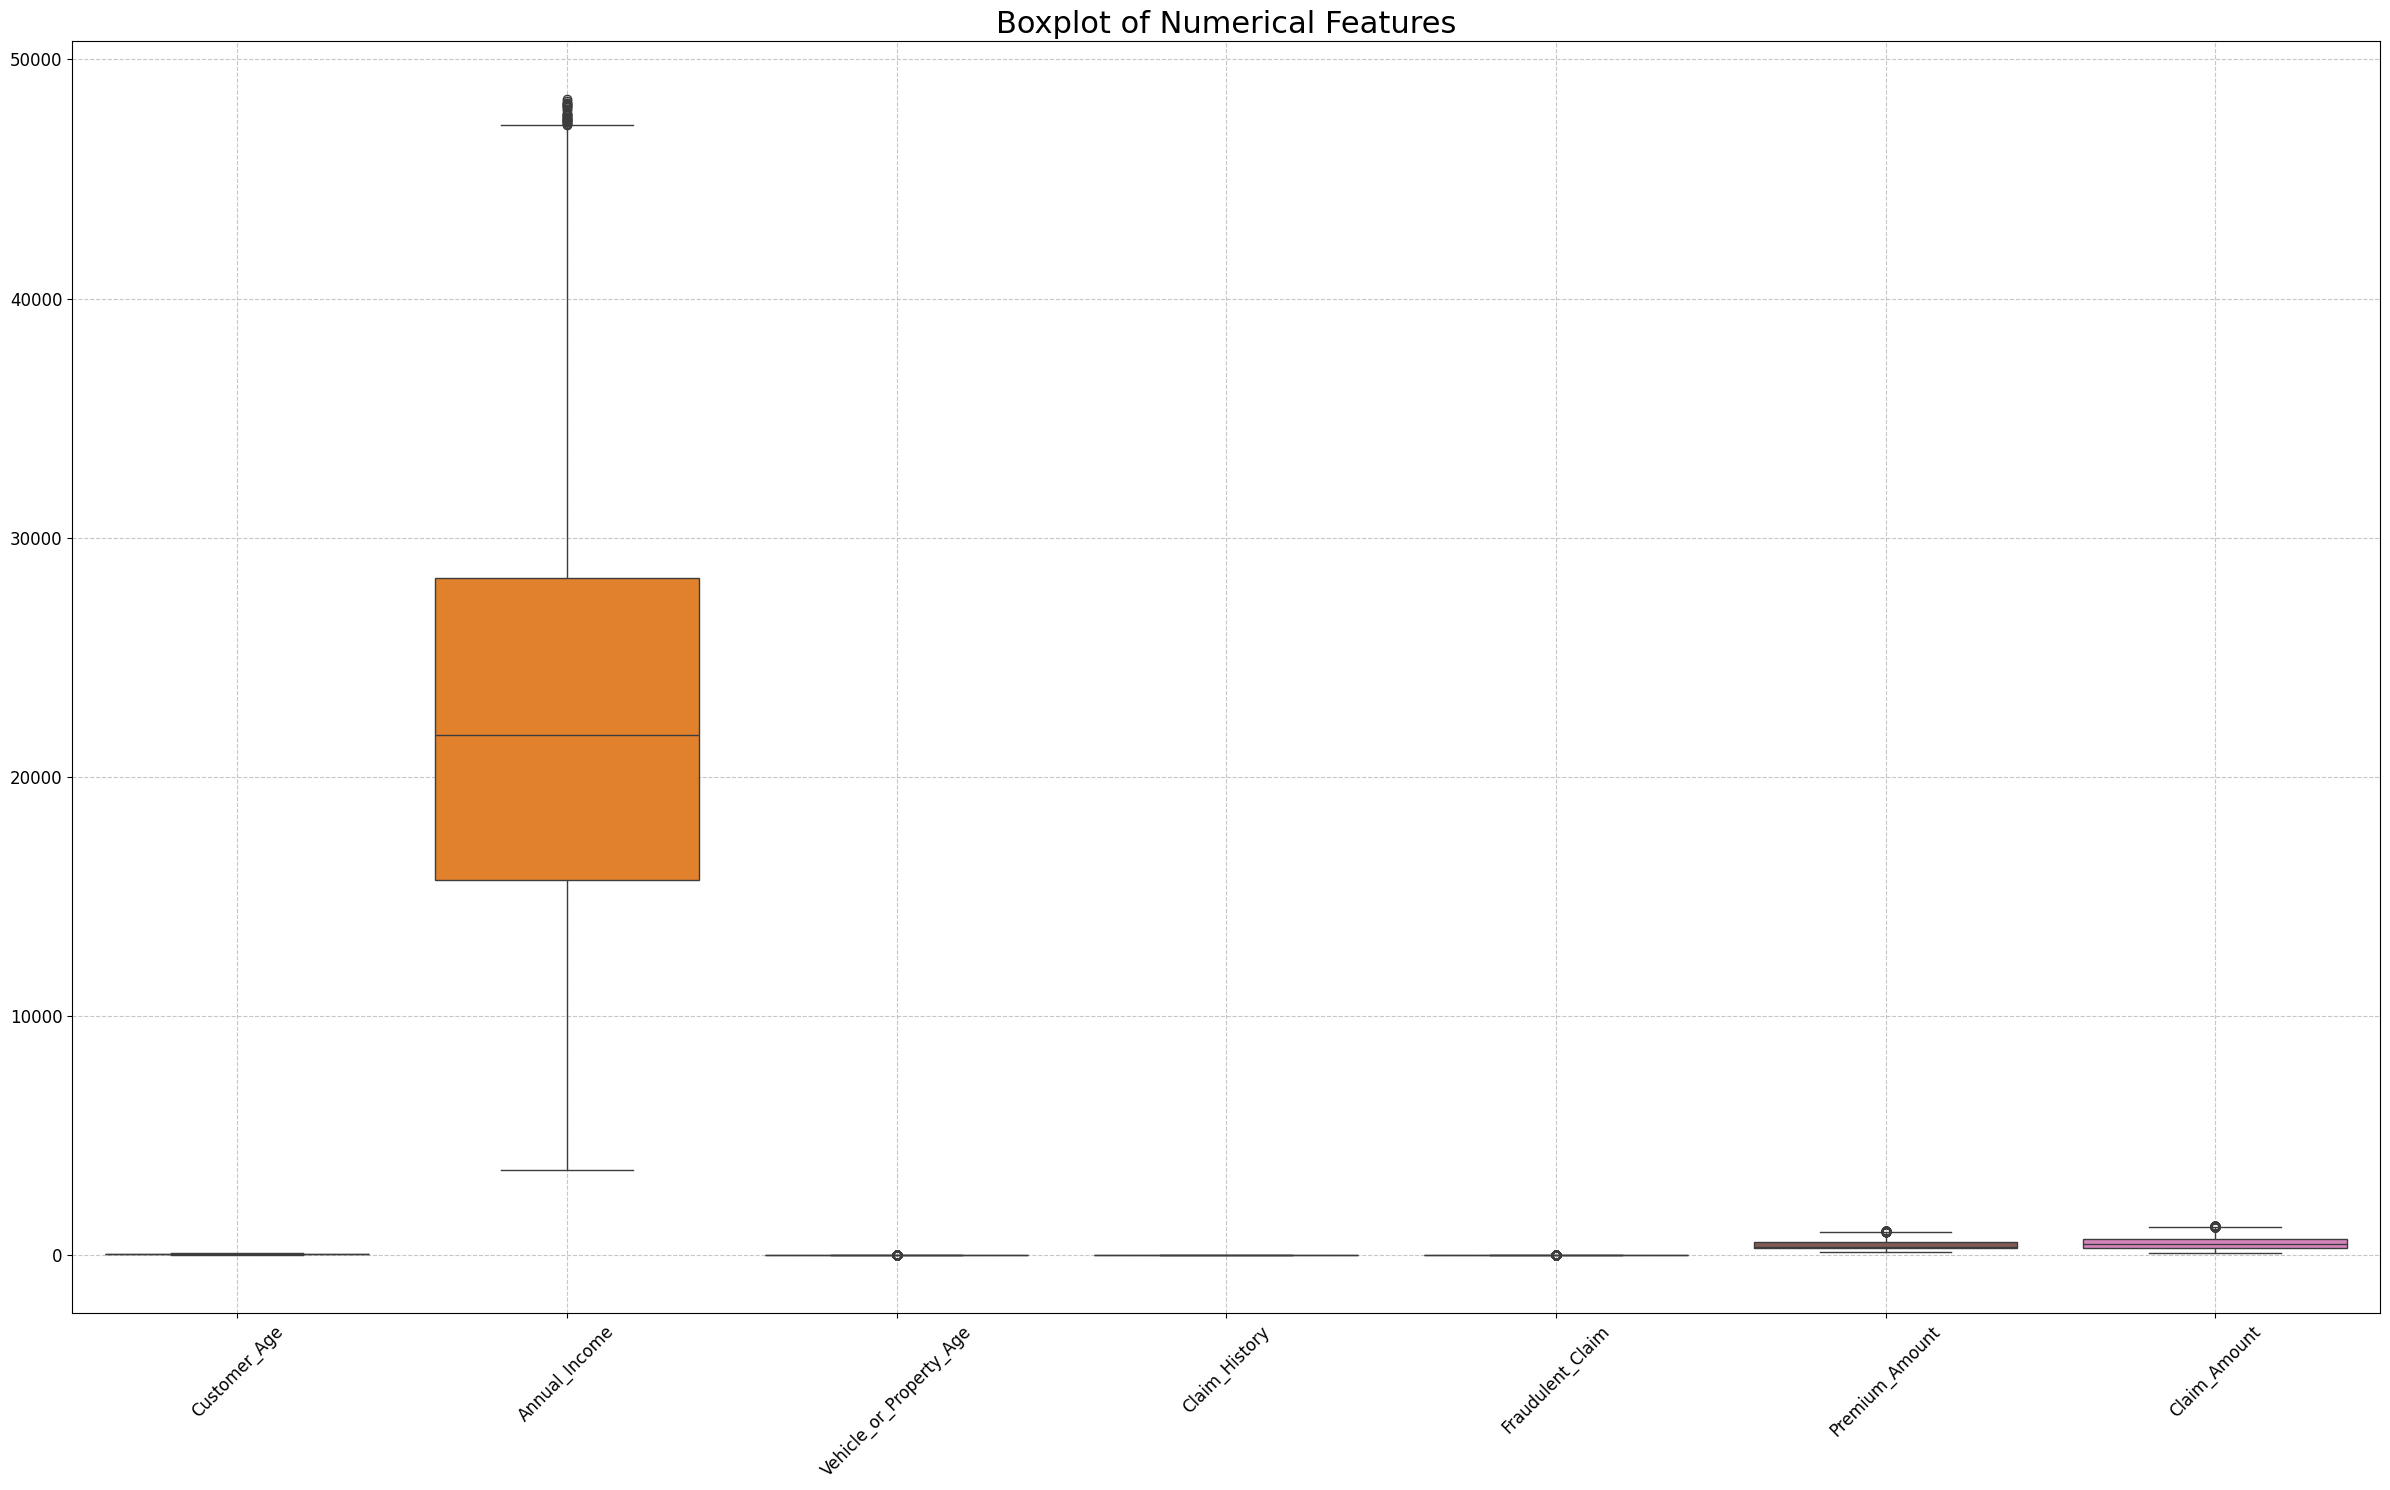

In [19]:
# Set up a large figure for better visibility
plt.figure(figsize=(24, 15))

# Draw a boxplot for all numerical columns in the DataFrame
sns.boxplot(data=df)

# Add title and improve layout
plt.title("Boxplot of Numerical Features", fontsize=22)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [20]:
df.head()

,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low
1,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium
2,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low
3,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low
4,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low


In [21]:
# Remove leading/trailing spaces from column names

df.columns = df.columns.str.strip() 

# Feature Engineering

In [23]:
# 1.Claim-to-Income Ratio

df['Claim_Income_Ratio'] = df['Claim_Amount'] / df['Annual_Income']
df.head()

,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Claim_Income_Ratio
0,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low,0.009787
1,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium,0.019034
2,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low,0.038142
3,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low,0.014053
4,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low,0.010635


In [24]:
# 2.Premium-to-Income Ratio

df['Premium_Income_Ratio'] = df['Premium_Amount'] / df['Annual_Income']
df.head()

,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Claim_Income_Ratio,Premium_Income_Ratio
0,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low,0.009787,0.018436
1,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium,0.019034,0.020288
2,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low,0.038142,0.024989
3,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low,0.014053,0.007191
4,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low,0.010635,0.011542


In [25]:
# 3. Is High Claim

df['High_Claim'] = df['Claim_Amount'] > df['Claim_Amount'].median()
df.head()

,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim
0,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low,0.009787,0.018436,False
1,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium,0.019034,0.020288,True
2,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low,0.038142,0.024989,False
3,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low,0.014053,0.007191,True
4,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low,0.010635,0.011542,False


In [26]:
# 4. Claim vs Premium Gap

df['Claim_Premium_Diff'] = df['Claim_Amount'] - df['Premium_Amount']

In [27]:
# 5. Age Grouping (Binning)

df['Age_Group'] = pd.cut(df['Customer_Age'],
                         bins=[0, 25, 40, 60, 100],
                         labels=['Young', 'Adult', 'Mid-Age', 'Senior'])

df

,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim,Claim_Premium_Diff,Age_Group
0,43,Female,Auto,20555.17,1.2,0,0,378.96,201.18,Low,0.009787,0.018436,False,-177.78,Mid-Age
1,47,Male,Health,24859.15,4.0,0,0,504.34,473.18,Medium,0.019034,0.020288,True,-31.16,Mid-Age
2,38,Female,Health,10803.51,6.5,0,0,269.97,412.07,Low,0.038142,0.024989,False,142.10,Adult
3,34,Male,Property,33232.13,2.6,0,0,238.96,467.02,Low,0.014053,0.007191,True,228.06,Adult
4,46,Male,Health,23997.00,0.3,0,0,276.97,255.20,Low,0.010635,0.011542,False,-21.77,Mid-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,48,Female,Health,15362.72,4.0,0,0,608.09,397.32,Medium,0.025863,0.039582,False,-210.77,Mid-Age
9995,28,Female,Health,24823.91,9.3,0,0,281.33,412.98,Low,0.016636,0.011333,False,131.65,Adult
9997,30,Male,Life,41804.32,7.5,0,0,271.46,400.78,Low,0.009587,0.006494,False,129.32,Adult
9998,44,Female,Life,17304.98,10.4,0,0,320.76,386.76,Low,0.022350,0.018536,False,66.00,Mid-Age


# categorical Encoding

In [28]:
# One-hot encoding for categorical variables
encoded_df = pd.get_dummies(df,columns=['Gender', 'Policy_Type','Age_Group'], drop_first=True,dtype='int')
encoded_df

,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior
0,43,20555.17,1.2,0,0,378.96,201.18,Low,0.009787,0.018436,False,-177.78,0,0,0,0,0,0,1,0
1,47,24859.15,4.0,0,0,504.34,473.18,Medium,0.019034,0.020288,True,-31.16,1,0,1,0,0,0,1,0
2,38,10803.51,6.5,0,0,269.97,412.07,Low,0.038142,0.024989,False,142.10,0,0,1,0,0,1,0,0
3,34,33232.13,2.6,0,0,238.96,467.02,Low,0.014053,0.007191,True,228.06,1,0,0,0,1,1,0,0
4,46,23997.00,0.3,0,0,276.97,255.20,Low,0.010635,0.011542,False,-21.77,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,48,15362.72,4.0,0,0,608.09,397.32,Medium,0.025863,0.039582,False,-210.77,0,0,1,0,0,0,1,0
9995,28,24823.91,9.3,0,0,281.33,412.98,Low,0.016636,0.011333,False,131.65,0,0,1,0,0,1,0,0
9997,30,41804.32,7.5,0,0,271.46,400.78,Low,0.009587,0.006494,False,129.32,1,0,0,1,0,1,0,0
9998,44,17304.98,10.4,0,0,320.76,386.76,Low,0.022350,0.018536,False,66.00,0,0,0,1,0,0,1,0


In [29]:
#Target label Encoding
encoded_df['Risk_Score_Label'] = encoded_df["Risk_Score"].replace({"Low":0,"Medium":1,"High":2})

C:\Users\Ganesh Baskar\AppData\Local\Temp\ipykernel_22716\2275231986.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['Risk_Score_Label'] = encoded_df["Risk_Score"].replace({"Low":0,"Medium":1,"High":2})


In [30]:
encoded_df["High_Claim"] = encoded_df["High_Claim"].astype('int')

In [31]:
encoded_df.drop(columns=['Risk_Score'],axis=1,inplace=True)

In [32]:
encoded_df

,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior,Risk_Score_Label
0,43,20555.17,1.2,0,0,378.96,201.18,0.009787,0.018436,0,-177.78,0,0,0,0,0,0,1,0,0
1,47,24859.15,4.0,0,0,504.34,473.18,0.019034,0.020288,1,-31.16,1,0,1,0,0,0,1,0,1
2,38,10803.51,6.5,0,0,269.97,412.07,0.038142,0.024989,0,142.10,0,0,1,0,0,1,0,0,0
3,34,33232.13,2.6,0,0,238.96,467.02,0.014053,0.007191,1,228.06,1,0,0,0,1,1,0,0,0
4,46,23997.00,0.3,0,0,276.97,255.20,0.010635,0.011542,0,-21.77,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,48,15362.72,4.0,0,0,608.09,397.32,0.025863,0.039582,0,-210.77,0,0,1,0,0,0,1,0,1
9995,28,24823.91,9.3,0,0,281.33,412.98,0.016636,0.011333,0,131.65,0,0,1,0,0,1,0,0,0
9997,30,41804.32,7.5,0,0,271.46,400.78,0.009587,0.006494,0,129.32,1,0,0,1,0,1,0,0,0
9998,44,17304.98,10.4,0,0,320.76,386.76,0.022350,0.018536,0,66.00,0,0,0,1,0,0,1,0,0


In [33]:
preprocessed_df = encoded_df.copy()

In [34]:
preprocessed_df.to_csv("C:/Users/Ganesh Baskar/OneDrive/Documents/Data/Insurance_data.csv")